In [2]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)
import chart_studio.plotly as py
cf.go_offline()
%matplotlib inline
import pandas_datareader.data as web
import datetime as dt
import scipy.stats as st
from sklearn.metrics import r2_score 

# MACHINE LEARNING
from sklearn.model_selection import train_test_split
# LOGISTIC REGRESSION MODEL IMPORTS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
#LINEAR REGRESSION MODEL IMPORTS
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#KNN MODEL IMPORTS
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#DECISION TREE IMPORTS
from sklearn.tree import DecisionTreeClassifier
#RANDOM FOREST IMPORTS
from sklearn.ensemble import RandomForestClassifier
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [3]:
# SPY DATA
spy0 = web.DataReader('SPY', 'yahoo', start='1993-01-28', end='2022-05-13')

In [4]:
spy0.drop("Adj Close", axis = 1, inplace = True)

In [5]:
spy0.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,406.410004,396.500000,405.100006,398.170013,155586100.0
2022-05-10,406.079987,394.820007,404.489990,399.089996,132497200.0
2022-05-11,404.040009,391.959991,398.070007,392.750000,142361000.0
2022-05-12,395.799988,385.149994,389.369995,392.339996,125090800.0
2022-05-13,403.179993,395.609985,396.709991,401.720001,104029300.0


In [6]:
# Current Day Close Return: Continuous (OUTPUT TO PREDICT)
output = pd.DataFrame((spy0["Close"]-spy0["Open"])/(spy0["Open"])).shift(-1)
output.columns = ["Return"]
output.tail()

,Return
Date,
2022-05-09,-0.013350
2022-05-10,-0.013365
2022-05-11,0.007628
2022-05-12,0.012629
2022-05-13,NaN


In [7]:
# Current Day Close Return: Categorical (OUTPUT TO PREDICT) (1 is positive or flat, 0 is negative)
outputc = pd.DataFrame(np.where(output.eval("Return >= 0"),1,0))
outputc.columns = ["Return C"]
outputc.index = output.index
outputc.tail()

,Return C
Date,
2022-05-09,0
2022-05-10,0
2022-05-11,1
2022-05-12,1
2022-05-13,0


In [8]:
# MODIFIED OUTCOME: Continuous (OUTPUT TO PREDICT)
moutput = pd.DataFrame(((spy0["High"]-spy0["Open"])-(spy0["Open"]-spy0["Low"]))/spy0["Open"]).shift(-1)
moutput.columns = ["Return"]
moutput.tail()

,Return
Date,
2022-05-09,-0.019976
2022-05-10,-0.000352
2022-05-11,0.005676
2022-05-12,0.013536
2022-05-13,NaN


In [9]:
# MODIFIED OUTCOME: Categorical (OUTPUT TO PREDICT) (1 is positive or flat, 0 is negative)
moutputc = pd.DataFrame(np.where(moutput.eval("Return >= 0"),1,0))
moutputc.index = moutput.index
moutputc.tail()

,0
Date,
2022-05-09,0
2022-05-10,0
2022-05-11,1
2022-05-12,1
2022-05-13,0


In [13]:
# Current Day OHLCV R
def cdayr(df):
    return pd.DataFrame(df.pct_change())

cdr = cdayr(spy0)
cdr.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,-0.020227,-0.022749,-0.014595,-0.032017,0.025811
2022-05-10,-0.000812,-0.004237,-0.001506,0.002311,-0.148400
2022-05-11,-0.005024,-0.007244,-0.015872,-0.015886,0.074445
2022-05-12,-0.020394,-0.017374,-0.021855,-0.001044,-0.121313
2022-05-13,0.018646,0.027158,0.018851,0.023908,-0.168370


In [15]:
# Previous Day OHLCV Return
def pdayr (df):
    return pd.DataFrame(df.pct_change()).shift(+1)
pdr = pdayr(spy0)
pdr.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,-0.024000,-0.009061,-0.031681,-0.005969,-0.122928
2022-05-10,-0.020227,-0.022749,-0.014595,-0.032017,0.025811
2022-05-11,-0.000812,-0.004237,-0.001506,0.002311,-0.148400
2022-05-12,-0.005024,-0.007244,-0.015872,-0.015886,0.074445
2022-05-13,-0.020394,-0.017374,-0.021855,-0.001044,-0.121313


In [16]:
# 4 period moving average
fpmaspy = spy0.rolling(window=4).mean()
fpmaspy.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,418.967499,406.345001,414.457497,413.095001,156108600.0
2022-05-10,413.072495,401.622505,411.309998,405.602501,153170925.0
2022-05-11,407.832497,397.252502,404.690002,400.337502,145528900.0
2022-05-12,403.082497,392.107498,399.257500,395.587502,138883775.0
2022-05-13,402.274994,391.884995,397.159996,396.474998,125994575.0


In [17]:
# 12 period moving average
tpmaspy = spy0.rolling(window=12).mean()
tpmaspy.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,423.496668,412.327499,419.536667,417.580836,1.342965e+08
2022-05-10,420.830002,409.775833,416.834999,415.335002,1.342986e+08
2022-05-11,418.775836,407.535833,414.701665,412.355001,1.361914e+08
2022-05-12,416.255834,404.959165,411.663333,410.375000,1.379493e+08
2022-05-13,414.610832,403.342496,409.952499,409.079168,1.364492e+08


In [18]:
# MACD (Moving Average Convergence Divergence) between OHLC and vol and the 4 MAs as a %
fmacdspy = (spy0-fpmaspy)/(fpmaspy)
fmacdspy.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,-0.029972,-0.024228,-0.022578,-0.036130,-0.003347
2022-05-10,-0.016928,-0.016938,-0.016581,-0.016056,-0.134972
2022-05-11,-0.009299,-0.013323,-0.016358,-0.018953,-0.021768
2022-05-12,-0.018067,-0.017744,-0.024765,-0.008209,-0.099313
2022-05-13,0.002250,0.009505,-0.001133,0.013229,-0.174335


In [19]:
# MACD (Moving Average Convergence Divergence) between OHLC and vol and the 12 MAs as a %
tmacdspy = (spy0-tpmaspy)/(tpmaspy)
tmacdspy.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,-0.040347,-0.038386,-0.034411,-0.046484,0.158527
2022-05-10,-0.035050,-0.036498,-0.029616,-0.039113,-0.013413
2022-05-11,-0.035188,-0.038220,-0.040105,-0.047544,0.045301
2022-05-12,-0.049142,-0.048916,-0.054154,-0.043948,-0.093212
2022-05-13,-0.027570,-0.019171,-0.032303,-0.017990,-0.237597


In [20]:
# MACD (Moving Average Convergence Divergence) between 4 MAs and the 12 MAs as a % of 12ma
ftmaspy_ = (fpmaspy - tpmaspy)/(tpmaspy)
ftmaspy_.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,-0.010695,-0.014509,-0.012107,-0.010742,0.162418
2022-05-10,-0.018434,-0.019897,-0.013255,-0.023433,0.140525
2022-05-11,-0.026132,-0.025233,-0.024142,-0.029144,0.068562
2022-05-12,-0.031647,-0.031736,-0.030136,-0.036034,0.006774
2022-05-13,-0.029753,-0.028406,-0.031205,-0.030811,-0.076619


In [21]:
# MACD (Moving Average Convergence Divergence) between 4 MAs and the 12 MAs as a %
ftmaspy = (fpmaspy - tpmaspy)/((fpmaspy+tpmaspy)/2)
ftmaspy.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,-0.010752,-0.014615,-0.012180,-0.010800,0.150218
2022-05-10,-0.018605,-0.020097,-0.013343,-0.023711,0.131300
2022-05-11,-0.026478,-0.025555,-0.024437,-0.029575,0.066289
2022-05-12,-0.032156,-0.032247,-0.030597,-0.036695,0.006751
2022-05-13,-0.030202,-0.028816,-0.031699,-0.031293,-0.079671


In [22]:
# SPY COMBO DF:
spy = pd.concat([output,outputc,moutput, moutputc,cdr, pdr,fmacdspy,tmacdspy, ftmaspy_,ftmaspy], axis = 1)
spy.columns = ["Predict R","Predict RC","Predict MR","Predict MRC",
               "SPY HR","SPY LR","SPY OR","SPY CR","SPY VR","SPY T-1V",
              "SPY T-1CR","SPY T-1OR","SPY T-1HR","SPY T-1LR","SPYH-4","SPYL-4","SPYO-4","SPYC-4","SPYV-4",
              "SPYH-12","SPYL-12","SPYO-12","SPYC-12","SPYV-12",
               "SPYH1 4-12","SPYL1 4-12","SPYO1 4-12","SPYC1 4-12","SPYV1 4-12",
               "SPYH 4-12","SPYL 4-12","SPYO 4-12","SPYC 4-12","SPYV 4-12"]
spy.tail()

,Predict R,Predict RC,Predict MR,Predict MRC,SPY HR,SPY LR,SPY OR,SPY CR,SPY VR,SPY T-1V,...,SPYH1 4-12,SPYL1 4-12,SPYO1 4-12,SPYC1 4-12,SPYV1 4-12,SPYH 4-12,SPYL 4-12,SPYO 4-12,SPYC 4-12,SPYV 4-12
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-09,-0.013350,0,-0.019976,0,-0.020227,-0.022749,-0.014595,-0.032017,0.025811,-0.024000,...,-0.010695,-0.014509,-0.012107,-0.010742,0.162418,-0.010752,-0.014615,-0.012180,-0.010800,0.150218
2022-05-10,-0.013365,0,-0.000352,0,-0.000812,-0.004237,-0.001506,0.002311,-0.148400,-0.020227,...,-0.018434,-0.019897,-0.013255,-0.023433,0.140525,-0.018605,-0.020097,-0.013343,-0.023711,0.131300
2022-05-11,0.007628,1,0.005676,1,-0.005024,-0.007244,-0.015872,-0.015886,0.074445,-0.000812,...,-0.026132,-0.025233,-0.024142,-0.029144,0.068562,-0.026478,-0.025555,-0.024437,-0.029575,0.066289
2022-05-12,0.012629,1,0.013536,1,-0.020394,-0.017374,-0.021855,-0.001044,-0.121313,-0.005024,...,-0.031647,-0.031736,-0.030136,-0.036034,0.006774,-0.032156,-0.032247,-0.030597,-0.036695,0.006751
2022-05-13,NaN,0,NaN,0,0.018646,0.027158,0.018851,0.023908,-0.168370,-0.020394,...,-0.029753,-0.028406,-0.031205,-0.030811,-0.076619,-0.030202,-0.028816,-0.031699,-0.031293,-0.079671


In [23]:
######################################

In [24]:
# Sentiment Data: 01/29/1993 - 05/12/2022
df0 = pd.read_excel("sentiment.xls",sheet_name = "SENTIMENT", skiprows = 294)
df00 = df0.drop(df0.index[1527:]).drop(df0.columns[4:],axis = 1)
df00.columns=["Date","Bull","Neutral","Bear"]
sdf = df00.set_index("Date")
sdf.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,0.158371,0.357466,0.484163
2022-04-21,0.188679,0.372642,0.438679
2022-04-28,0.164384,0.242009,0.593607
2022-05-05,0.268722,0.202643,0.528634
2022-05-12,0.243243,0.266409,0.490347


In [28]:
# Bull, neutral, bear Current Day Return
cdrs = cdayr(sdf)
cdrs.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,-0.359149,0.054223,0.170061
2022-04-21,0.191373,0.042454,-0.093944
2022-04-28,-0.128764,-0.350559,0.353169
2022-05-05,0.634721,-0.162663,-0.109455
2022-05-12,-0.094815,0.314672,-0.072426


In [29]:
# Bull, neutral, bear Previous Day Return
pdrs = pdayr(sdf)
pdrs.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,-0.224924,-0.164410,0.502724
2022-04-21,-0.359149,0.054223,0.170061
2022-04-28,0.191373,0.042454,-0.093944
2022-05-05,-0.128764,-0.350559,0.353169
2022-05-12,0.634721,-0.162663,-0.109455


In [30]:
# 4 period moving average
fpma = sdf.rolling(window=4).mean()
fpma.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,0.263095,0.354951,0.381954
2022-04-21,0.228254,0.368746,0.402999
2022-04-28,0.189640,0.327799,0.482561
2022-05-05,0.195039,0.293690,0.511271
2022-05-12,0.216257,0.270926,0.512817


In [31]:
# 12 period moving average
tpma = sdf.rolling(window=12).mean()
tpma.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,0.248937,0.318809,0.432255
2022-04-21,0.245379,0.329927,0.424694
2022-04-28,0.237000,0.325219,0.437780
2022-05-05,0.239095,0.308630,0.452275
2022-05-12,0.243324,0.299532,0.457143


In [32]:
# MACD (Moving Average Convergence Divergence) between Bull, Neutral, Bear and the 4 MAs
fmacdsen = sdf-fpma
fmacdsen.head()

,Bull,Neutral,Bear
Date,,,
1993-01-29,NaN,NaN,NaN
1993-02-05,NaN,NaN,NaN
1993-02-12,NaN,NaN,NaN
1993-02-19,0.0175,-0.0525,0.0350
1993-02-26,-0.0875,0.0100,0.0775


In [33]:
# MACD (Moving Average Convergence Divergence) between Bull, Neutral, Bear and the 12 MAs
tmacdsen = sdf-tpma
tmacdsen.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,-0.090565,0.038657,0.051908
2022-04-21,-0.056700,0.042715,0.013985
2022-04-28,-0.072616,-0.083210,0.155827
2022-05-05,0.029627,-0.105987,0.076359
2022-05-12,-0.000081,-0.033123,0.033204


In [34]:
# MACD (Moving Average Convergence Divergence) between 4 MAs and the 12 MAs
ftmasen = fpma - tpma
ftmasen.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,0.014158,0.036142,-0.050301
2022-04-21,-0.017124,0.038819,-0.021694
2022-04-28,-0.047360,0.002580,0.044780
2022-05-05,-0.044056,-0.014940,0.058996
2022-05-12,-0.027067,-0.028607,0.055674


In [35]:
# SENTIMENT COMBO DF:
sentiment = pd.concat([sdf,cdrs,pdrs,fpma,tpma,fmacdsen,tmacdsen,ftmasen], axis = 1)
sentiment.columns = ["Bull","Neutral","Bear","Bull R","Neutral R","Bear R",
                     "Bull T-1R","Neutral T-1R","Bear T-1R","Bull 4","Neutral 4","Bear 4",
                     "Bull 12","Neutral 12","Bear 12","Bull-4","Neutral-4","Bear-4"
                    ,"Bull-12","Neutral-12","Bear-12","Bull 4-12","Neutral 4-12","Bear 4-12"]
sentiment.tail()

,Bull,Neutral,Bear,Bull R,Neutral R,Bear R,Bull T-1R,Neutral T-1R,Bear T-1R,Bull 4,...,Bear 12,Bull-4,Neutral-4,Bear-4,Bull-12,Neutral-12,Bear-12,Bull 4-12,Neutral 4-12,Bear 4-12
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-14,0.158371,0.357466,0.484163,-0.359149,0.054223,0.170061,-0.224924,-0.164410,0.502724,0.263095,...,0.432255,-0.104724,0.002515,0.102209,-0.090565,0.038657,0.051908,0.014158,0.036142,-0.050301
2022-04-21,0.188679,0.372642,0.438679,0.191373,0.042454,-0.093944,-0.359149,0.054223,0.170061,0.228254,...,0.424694,-0.039575,0.003896,0.035680,-0.056700,0.042715,0.013985,-0.017124,0.038819,-0.021694
2022-04-28,0.164384,0.242009,0.593607,-0.128764,-0.350559,0.353169,0.191373,0.042454,-0.093944,0.189640,...,0.437780,-0.025256,-0.085790,0.111046,-0.072616,-0.083210,0.155827,-0.047360,0.002580,0.044780
2022-05-05,0.268722,0.202643,0.528634,0.634721,-0.162663,-0.109455,-0.128764,-0.350559,0.353169,0.195039,...,0.452275,0.073683,-0.091047,0.017363,0.029627,-0.105987,0.076359,-0.044056,-0.014940,0.058996
2022-05-12,0.243243,0.266409,0.490347,-0.094815,0.314672,-0.072426,0.634721,-0.162663,-0.109455,0.216257,...,0.457143,0.026986,-0.004517,-0.022470,-0.000081,-0.033123,0.033204,-0.027067,-0.028607,0.055674


In [36]:
######################################

In [37]:
# COMBINING BOTH SPY AND SENTIMENT DFs

combo0 = pd.concat([spy,sentiment],axis = 1)
combo = combo0.dropna()
combo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1479 entries, 1993-04-16 to 2022-05-12
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Predict R     1479 non-null   float64
 1   Predict RC    1479 non-null   float64
 2   Predict MR    1479 non-null   float64
 3   Predict MRC   1479 non-null   float64
 4   SPY HR        1479 non-null   float64
 5   SPY LR        1479 non-null   float64
 6   SPY OR        1479 non-null   float64
 7   SPY CR        1479 non-null   float64
 8   SPY VR        1479 non-null   float64
 9   SPY T-1V      1479 non-null   float64
 10  SPY T-1CR     1479 non-null   float64
 11  SPY T-1OR     1479 non-null   float64
 12  SPY T-1HR     1479 non-null   float64
 13  SPY T-1LR     1479 non-null   float64
 14  SPYH-4        1479 non-null   float64
 15  SPYL-4        1479 non-null   float64
 16  SPYO-4        1479 non-null   float64
 17  SPYC-4        1479 non-null   float64
 18  SPYV-4    

In [38]:
######################################

<AxesSubplot:title={'center':'Distribution of next day modified returns'}, xlabel='Predict MR', ylabel='Count'>

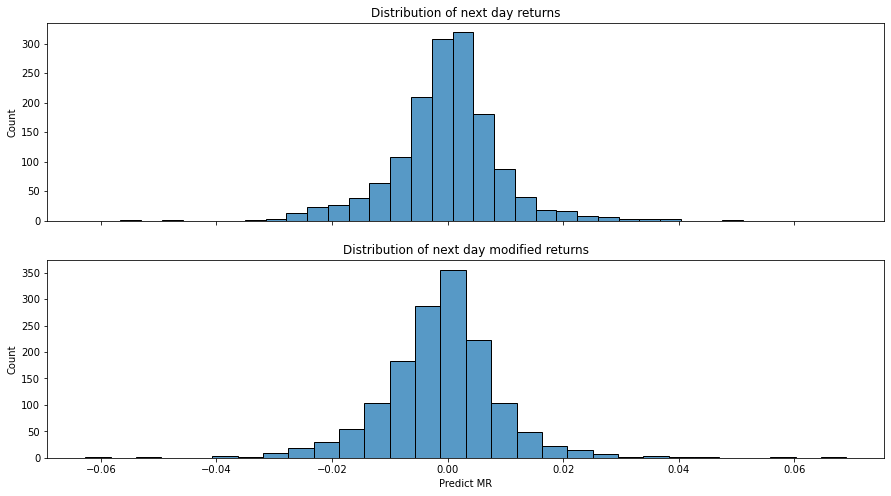

In [39]:
# PLOTS TO ANALYZE DATA
fig,axes = plt.subplots(ncols = 1, nrows =2, sharex = True, figsize = (15,8))
axes[0].set_title("Distribution of next day returns")
sns.histplot(ax = axes[0],x = combo["Predict R"], bins = 30)

axes[1].set_title("Distribution of next day modified returns")
sns.histplot(ax = axes[1],x = combo["Predict MR"], bins = 30)

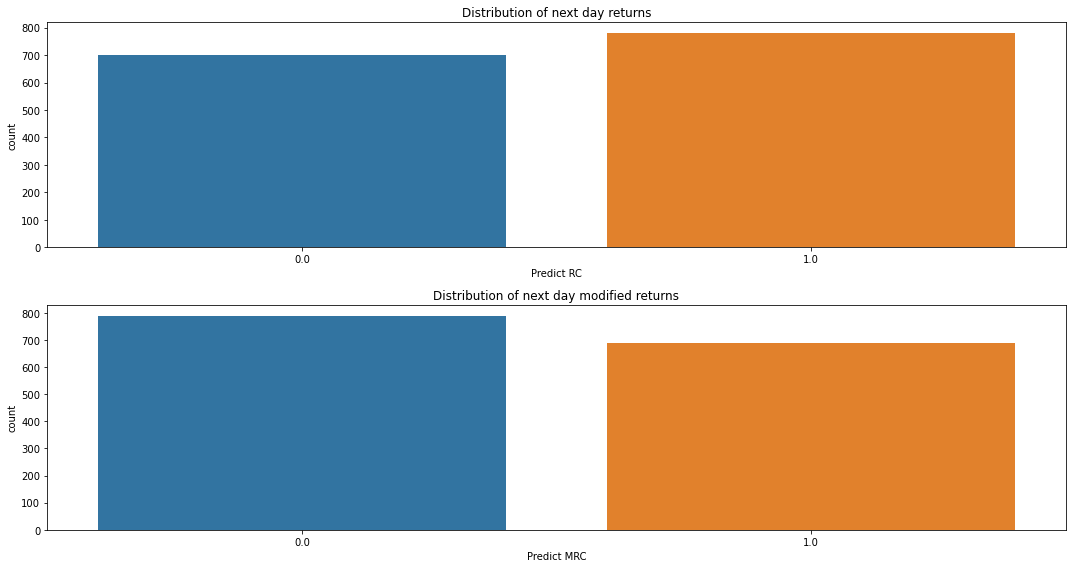

In [40]:
fig,axes = plt.subplots(ncols = 1, nrows =2, figsize = (15,8))
axes[0].set_title("Distribution of next day returns")
sns.countplot(ax = axes[0],x = combo["Predict RC"])

axes[1].set_title("Distribution of next day modified returns")
sns.countplot(ax = axes[1],x = combo["Predict MRC"])
plt.tight_layout()

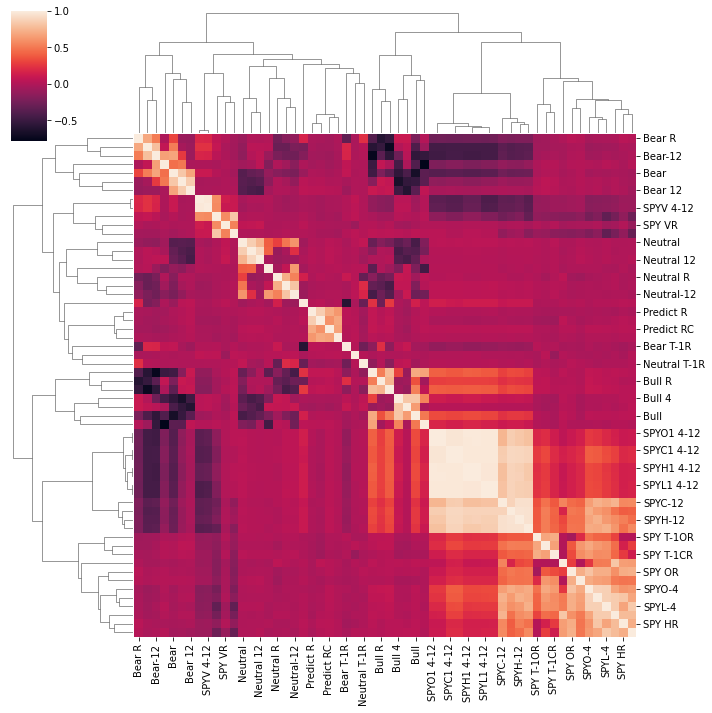

In [41]:
sns.clustermap(combo.corr())

<AxesSubplot:>

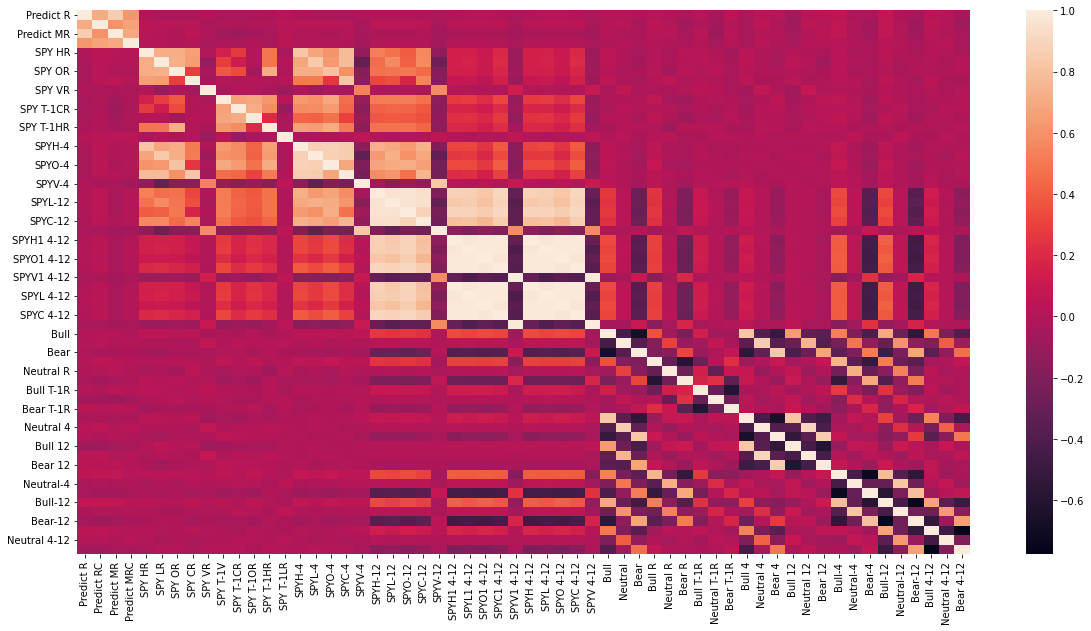

In [42]:
plt.figure(figsize = (20,10))
sns.heatmap(combo.corr())

In [43]:
######################################

In [43]:
## LOGISTIC REGRESSION MODEL1: LOGRM1
X = combo.drop(["Predict RC","Predict R","Predict MRC","Predict MR"],axis = 1)
y = combo["Predict RC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.48      0.30      0.37       211
         1.0       0.53      0.71      0.61       233

    accuracy                           0.52       444
   macro avg       0.51      0.51      0.49       444
weighted avg       0.51      0.52      0.50       444

[[ 64 147]
 [ 68 165]]


In [44]:
## LOGISTIC REGRESSION MODEL2: LOGRM2
X = combo.drop(["Predict RC","Predict R","Predict MRC","Predict MR"],axis = 1)
y = combo["Predict MRC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.52      0.74      0.61       235
         1.0       0.43      0.22      0.29       209

    accuracy                           0.50       444
   macro avg       0.47      0.48      0.45       444
weighted avg       0.47      0.50      0.46       444

[[175  60]
 [164  45]]


In [45]:
## LINEAR REGRESSION MODEL1: LRM1
X = combo.drop(["Predict RC","Predict R","Predict MRC","Predict MR"],axis = 1)
y = combo["Predict R"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
coef = pd.DataFrame(lr.coef_, X_train.columns, columns = ["Coef"])
# coef

<AxesSubplot:xlabel='Predict R'>

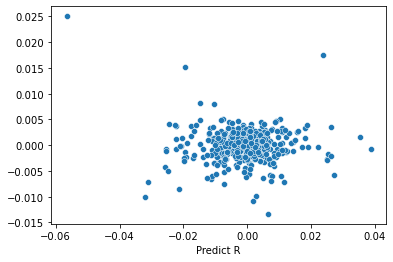

In [46]:
# SCATTER OF LRM1 AND ACTUAL
sns.scatterplot(y = predictions, x = y_test)

In [48]:
# LRM1 METRICS 
print("MAE:", metrics.mean_absolute_error(y_test,predictions))
print("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("RRMSE:",(np.sqrt(metrics.mean_squared_error(y_test,predictions)))/y_test.mean())
print("R2:",r2_score(y_test,predictions))

MAE: 0.00706062761189551
MSE: 0.00010502728942253517
RMSE: 0.01024828226692333
RRMSE: -12.757852794075157
R2: -0.15003972586116676


In [49]:
## LINEAR REGRESSION MODEL2: LRM2
X = combo.drop(["Predict RC","Predict R","Predict MRC","Predict MR"],axis = 1)
y = combo["Predict MR"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
coef = pd.DataFrame(lr.coef_, X_train.columns, columns = ["Coef"])
# coef

<AxesSubplot:xlabel='Predict MR'>

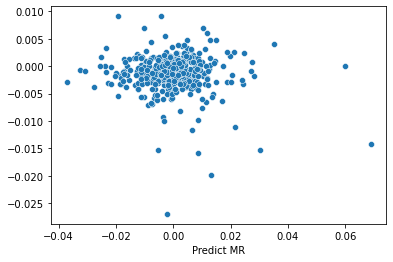

In [50]:
# SCATTER OF LRM2 AND ACTUAL
sns.scatterplot(y = predictions, x = y_test)

In [51]:
# LRM2 METRICS 
print("MAE:", metrics.mean_absolute_error(y_test,predictions))
print("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("RRMSE:",(np.sqrt(metrics.mean_squared_error(y_test,predictions)))/y_test.mean())
print("R2:",r2_score(y_test,predictions))

MAE: 0.0077493373478480145
MSE: 0.0001287320016321934
RMSE: 0.011346012587345099
RRMSE: -14.53576650709781
R2: -0.15397022995849818


In [52]:
# KNN MODEL 1: KNN1
scaler = StandardScaler()
scaler.fit(combo.drop(["Predict RC","Predict MRC","Predict R","Predict MR"],axis = 1))
scaled_features = scaler.transform(combo.drop(["Predict RC","Predict MRC","Predict R","Predict MR"],axis = 1))
combo_feat = pd.DataFrame(scaled_features, columns = combo.drop(["Predict RC","Predict MRC","Predict R","Predict MR"],axis = 1).columns)
X = combo_feat
y = combo["Predict RC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
p1 = knn.predict(X_test)
print(classification_report(y_test,p1))
print(confusion_matrix(y_test,p1))

              precision    recall  f1-score   support

         0.0       0.51      0.47      0.49       206
         1.0       0.57      0.60      0.58       238

    accuracy                           0.54       444
   macro avg       0.54      0.54      0.54       444
weighted avg       0.54      0.54      0.54       444

[[ 97 109]
 [ 95 143]]


Text(0, 0.5, 'Error Rate')

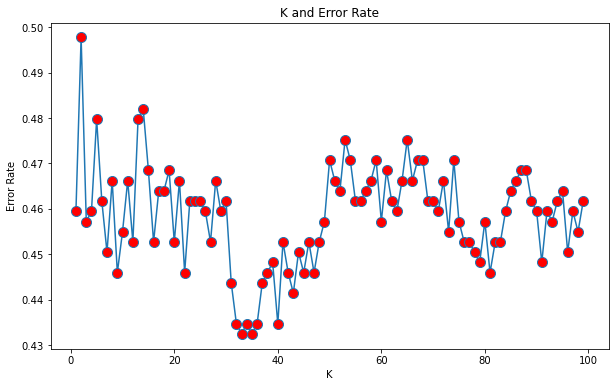

In [53]:
# KNN1 ELBOW METHOD ADJUSTMENT OF K
error_rate = []
for i in range (1,100):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    p1 = knn.predict(X_test)
    error_rate.append(np.mean(p1 != y_test))
plt.figure(figsize = (10,6))
plt.plot(range(1,100),error_rate, marker = "o", markerfacecolor= "red", markersize = 10)
plt.title("K and Error Rate")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [54]:
# KNN1 Adjusted with K = 35
knn = KNeighborsClassifier(n_neighbors = 35)
knn.fit(X_train,y_train)
p1 = knn.predict(X_test)
print(classification_report(y_test,p1))
print(confusion_matrix(y_test,p1))

              precision    recall  f1-score   support

         0.0       0.55      0.38      0.45       206
         1.0       0.58      0.73      0.64       238

    accuracy                           0.57       444
   macro avg       0.56      0.55      0.55       444
weighted avg       0.56      0.57      0.55       444

[[ 78 128]
 [ 64 174]]


In [55]:
# KNN MODEL 2: KNN2
scaler = StandardScaler()
scaler.fit(combo.drop(["Predict RC","Predict MRC","Predict R","Predict MR"],axis = 1))
scaled_features = scaler.transform(combo.drop(["Predict RC","Predict MRC","Predict R","Predict MR"],axis = 1))
combo_feat = pd.DataFrame(scaled_features, columns = combo.drop(["Predict RC","Predict MRC","Predict R","Predict MR"],axis = 1).columns)
X = combo_feat
y = combo["Predict MRC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
p1 = knn.predict(X_test)
print(classification_report(y_test,p1))
print(confusion_matrix(y_test,p1))

              precision    recall  f1-score   support

         0.0       0.57      0.53      0.55       242
         1.0       0.48      0.51      0.50       202

    accuracy                           0.52       444
   macro avg       0.52      0.52      0.52       444
weighted avg       0.53      0.52      0.52       444

[[128 114]
 [ 98 104]]


Text(0, 0.5, 'Error Rate')

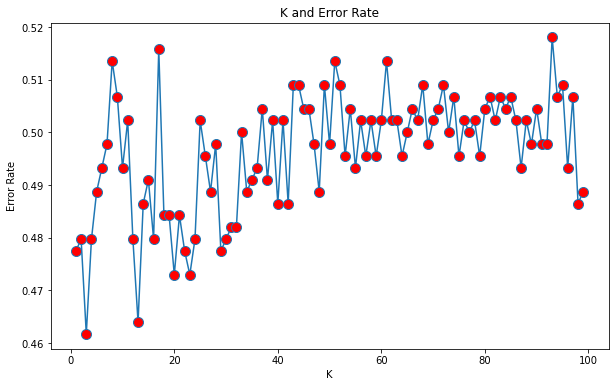

In [56]:
# KNN2 ELBOW METHOD ADJUSTMENT OF K
error_rate = []
for i in range (1,100):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    p1 = knn.predict(X_test)
    error_rate.append(np.mean(p1 != y_test))
plt.figure(figsize = (10,6))
plt.plot(range(1,100),error_rate, marker = "o", markerfacecolor= "red", markersize = 10)
plt.title("K and Error Rate")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [57]:
# KNN2 Adjusted with K = 2
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
p1 = knn.predict(X_test)
print(classification_report(y_test,p1))
print(confusion_matrix(y_test,p1))

              precision    recall  f1-score   support

         0.0       0.54      0.75      0.63       242
         1.0       0.45      0.24      0.32       202

    accuracy                           0.52       444
   macro avg       0.50      0.50      0.47       444
weighted avg       0.50      0.52      0.49       444

[[182  60]
 [153  49]]


In [58]:
# DECISION TREE 1: DT1
X = combo.drop(["Predict RC","Predict R","Predict MRC","Predict MR"],axis = 1)
y = combo["Predict RC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
p1 = dtree.predict(X_test)
print(confusion_matrix(y_test,p1))
print(classification_report(y_test,p1))

[[110 115]
 [110 109]]
              precision    recall  f1-score   support

         0.0       0.50      0.49      0.49       225
         1.0       0.49      0.50      0.49       219

    accuracy                           0.49       444
   macro avg       0.49      0.49      0.49       444
weighted avg       0.49      0.49      0.49       444



In [59]:
# RANDOM FOREST 1: RF1
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train,y_train)
p2 = rf.predict(X_test)
print(confusion_matrix(y_test,p2))
print(classification_report(y_test,p2))

[[ 84 141]
 [ 71 148]]
              precision    recall  f1-score   support

         0.0       0.54      0.37      0.44       225
         1.0       0.51      0.68      0.58       219

    accuracy                           0.52       444
   macro avg       0.53      0.52      0.51       444
weighted avg       0.53      0.52      0.51       444



In [60]:
# DECISION TREE 2: DT2
X = combo.drop(["Predict RC","Predict R","Predict MRC","Predict MR"],axis = 1)
y = combo["Predict MRC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
p1 = dtree.predict(X_test)
print(confusion_matrix(y_test,p1))
print(classification_report(y_test,p1))

[[128  99]
 [123  94]]
              precision    recall  f1-score   support

         0.0       0.51      0.56      0.54       227
         1.0       0.49      0.43      0.46       217

    accuracy                           0.50       444
   macro avg       0.50      0.50      0.50       444
weighted avg       0.50      0.50      0.50       444



In [61]:
# RANDOM FOREST 2: RF2
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train,y_train)
p2 = rf.predict(X_test)
print(confusion_matrix(y_test,p2))
print(classification_report(y_test,p2))

[[169  58]
 [158  59]]
              precision    recall  f1-score   support

         0.0       0.52      0.74      0.61       227
         1.0       0.50      0.27      0.35       217

    accuracy                           0.51       444
   macro avg       0.51      0.51      0.48       444
weighted avg       0.51      0.51      0.48       444



In [62]:
# Support Vector Machine 1: SVM1
X = combo.drop(["Predict RC","Predict R","Predict MRC","Predict MR"],axis = 1)
y = combo["Predict RC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = SVC()
model.fit(X_train,y_train)
p1 = model.predict(X_test)
print(classification_report(y_test, p1))
print(confusion_matrix(y_test,p1))

              precision    recall  f1-score   support

         0.0       0.55      0.32      0.40       201
         1.0       0.58      0.78      0.67       243

    accuracy                           0.57       444
   macro avg       0.56      0.55      0.53       444
weighted avg       0.57      0.57      0.55       444

[[ 64 137]
 [ 53 190]]


In [63]:
# Grid Search
param_grid = {"C":[.1,1,10,100,1000],"gamma":[1,.1,.01,.001,.0001]}
grid = GridSearchCV(SVC(), param_grid,verbose = 3)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test,grid_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.522 total time=   0.2s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.517 total time=   0.1s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.517 total time=   0.1s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.517 total time=   0.1s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.517 total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.522 total time=   0.1s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.522 total time=   0.1s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.517 total time=   0.1s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.517 total time=   0.1s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.517 total time=   0.1s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.522 total time=   0.1s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ...................C=1000, gamma=1;, score=0.473 total time=   0.2s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.512 total time=   0.3s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.551 total time=   0.3s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.493 total time=   0.4s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.570 total time=   0.4s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.498 total time=   0.4s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.551 total time=   0.3s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.464 total time=   0.4s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.517 total time=   0.4s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.517 total time=   0.1s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.551 total time=   0.1s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.585 total time=   0.2s
[CV 4/5] END ...............